findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu


0.8750000000000001 9.036201327981216e-05


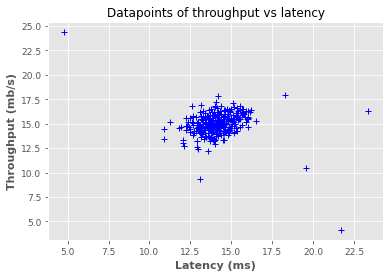

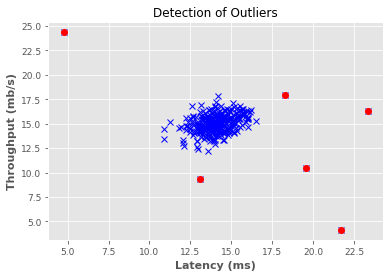

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import csv
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 13

from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score

#Let us explore our dataset. We first read them from our csv files
reader = csv.reader(open("C:/Users/anude/Downloads/anomaly-detection-master/train_server_data.csv", "r"), delimiter=",")
reader1 = csv.reader(open("C:/Users/anude/Downloads/anomaly-detection-master/crossval_server_data.csv", "r"), delimiter=",")
reader2 = csv.reader(open("C:/Users/anude/Downloads/anomaly-detection-master/test_server_data.csv", "r"), delimiter=",")

tr = list(reader)
cv = list(reader1)
ts = list(reader2)
train_data = np.array(tr[: :]).astype("float")
crossval_data = np.array(cv[: :]).astype("float")
test_data = np.array(ts[: :]).astype("float")


#n_dim = train_data[1]

#print('Number of datapoints in training set: %d' % n_training_samples)
#print('Number of dimensions/features: %d' % n_dim)


#print(train_data[1:5,:])

def read_dataset(filePath, delimiter=','):
    return genfromtxt(filePath, delimiter=delimiter)


def feature_normalize(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.std(dataset, axis=0)
    return (dataset - mu) / sigma


def estimate_gaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma


def multivariate_gaussian(dataset, mu, sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)


def select_threshold(probs, test_data):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 1000;
    epsilons = np.arange(min(probs), max(probs), stepsize)
    for epsilon in np.nditer(epsilons):
        predictions = (probs < epsilon)
        f = f1_score(test_data, predictions, average='binary')
        if f > best_f1:
            best_f1 = f
            best_epsilon = epsilon

    return best_f1, best_epsilon

mu, sigma = estimate_gaussian(train_data)
p = multivariate_gaussian(train_data,mu,sigma)

#selecting optimal value of epsilon using cross validation
p_cv = multivariate_gaussian(crossval_data,mu,sigma)
fscore, ep = select_threshold(p_cv,test_data)
print(fscore, ep)

#selecting outlier datapoints
outliers = np.asarray(np.where(p < ep))

plt.figure(1)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.title('Datapoints of throughput vs latency')
plt.plot(train_data[:,0], train_data[:,1],'b+')
plt.show()

plt.figure(2)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.title('Detection of Outliers')
plt.plot(train_data[:,0],train_data[:,1],'bx')
plt.plot(train_data[outliers,0],train_data[outliers,1],'ro')
plt.show()